# Fundamentals of Data Engineering
# Query Project
# Ryan Sawasaki

This jupyter notebook is a report providing findings regarding the data from Lyft Bay Wheels. The report provides insight into the 5 most popular "commuter trips" and recommendations for offers based on the findings

In [12]:
import pandas as pd

## 1. SQL Code and Pandas Dataframes

### Morning Commuter Trips
* The following SQL code loads the top 10 most popular morning commuter trips into Pandas using the magic command.<br> 
* Morning has been defined as those start dates which occur from the hours of 5am to 11:59am (PST).<br>
* Commuter trips has been defined as those trips which occur from Monday to Friday.<br>
* A single trip has a defined start station and end station name.


In [119]:
%%bigquery df_morning

SELECT start_station_name, end_station_name,
COUNT(CASE WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (2,3,4,5,6) and EXTRACT(HOUR FROM start_date) >= 5 and EXTRACT(HOUR FROM start_date) <= 11 THEN 1 END) AS weekday_morning_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY start_station_name, end_station_name ORDER BY weekday_morning_trips DESC LIMIT 10

In [24]:
df_morning

,start_station_name,end_station_name,weekday_morning_trips
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4981
1,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),4496
2,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,4446
3,Steuart at Market,2nd at Townsend,4294
4,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3787
5,Market at Sansome,2nd at South Park,3760
6,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3755
7,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3407
8,Steuart at Market,Embarcadero at Sansome,3266
9,San Francisco Caltrain (Townsend at 4th),Steuart at Market,3175


### Afternoon Commuter Trips 
* The following SQL code loads the top 10 most popular afternoon commuter trips into Pandas using the magic command.<br> 
* Afternoon has been defined as those start dates which occur from the hours of 12 noon to 6:59pm (PST).<br>
* Commuter trips has been defined as those trips which occur from Monday to Friday.<br>
* A single trip has a defined start station and end station name.

In [25]:
%%bigquery df_afternoon

SELECT start_station_name, end_station_name,
COUNT(CASE WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (2,3,4,5,6) and EXTRACT(HOUR FROM start_date) >= 12 and EXTRACT(HOUR FROM start_date) <= 18 THEN 1 END) AS weekday_afternoon_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY start_station_name, end_station_name ORDER BY weekday_afternoon_trips DESC LIMIT 10

In [26]:
df_afternoon

,start_station_name,end_station_name,weekday_afternoon_trips
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5503
1,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),5043
2,Embarcadero at Sansome,Steuart at Market,4608
3,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),4163
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),4111
5,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),3828
6,2nd at South Park,Market at Sansome,3773
7,Market at 10th,San Francisco Caltrain 2 (330 Townsend),3535
8,Howard at 2nd,San Francisco Caltrain (Townsend at 4th),3258
9,Townsend at 7th,Civic Center BART (7th at Market),2940


### Popular Commuter Stations
* Based on the morning and afternoon commuter trip data there is clear indication that many trips occur out of main transport hubs at the Ferry Building and the Caltrain station 
* The following SQL code loads the total number of commuter trips occuring out of the Ferry Building and Caltrain stations in the morning.<br>
* Morning has been defined as those start dates which occur from the hours of 5am to 11:59am (PST).<br>
* Commuter trips has been defined as those trips which occur from Monday to Friday.<br>
* This data is formatted as a csv file and then reading the csv file into Pandas. 
* This process was used simply to demonstrate knowledge of alternate methods of loading data into Pandas 

In [31]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, COUNT(CASE WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (2,3,4,5,6) and EXTRACT(HOUR FROM start_date) >= 5 and EXTRACT(HOUR FROM start_date) <= 11 THEN 1 END) AS weekday_morning_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE start_station_name IN ("Harry Bridges Plaza (Ferry Building)","San Francisco Caltrain (Townsend at 4th)","San Francisco Caltrain 2 (330 Townsend)") GROUP BY start_station_name ORDER BY weekday_morning_trips DESC'> result.csv

Waiting on bqjob_r2636a2d471f23f8b_0000017028d02ae3_1 ... (0s) Current status: DONE   


In [32]:
popular_stations = pd.read_csv('result.csv')

In [33]:
popular_stations

,start_station_name,weekday_morning_trips
0,San Francisco Caltrain (Townsend at 4th),46503
1,San Francisco Caltrain 2 (330 Townsend),35365
2,Harry Bridges Plaza (Ferry Building),23992


## 2. Data Visualizations

### Morning Commuter Trip Visualization
* The following chart shows the top 5 most popular commuter trips in the morning
* The morning was selected because it is shown that people have more consistent morning commute times compared to their evening commute times

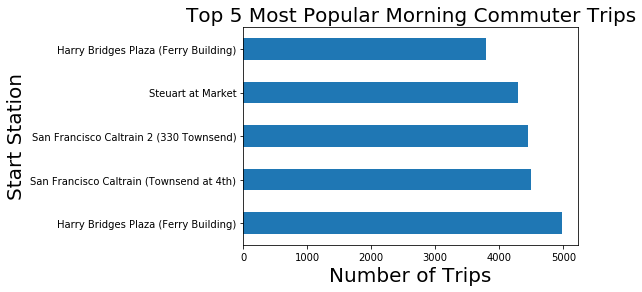

In [114]:
import matplotlib.pyplot as plt
morning_plot = df_morning.head()
morning_plot.plot(kind='barh',x='start_station_name',y='weekday_morning_trips', legend=None)

plt.title('Top 5 Most Popular Morning Commuter Trips',fontsize=20)

plt.ylabel('Start Station',fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Number of Trips',fontsize=20)
plt.xticks(fontsize=10)

ax2.plt
ax2 = ax.twinx()
ax2.set_ylabel("End Station")

plt.show()

### Popular Stations Visualization
* The following chart shows the 3 most popular station in the morning


(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text xticklabel objects>)

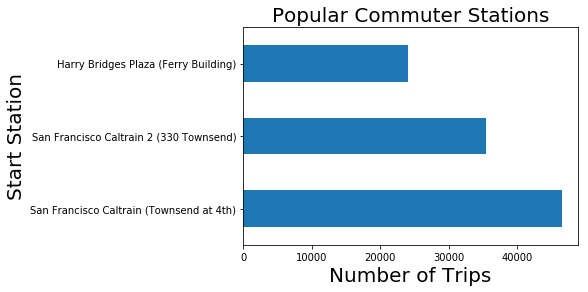

In [107]:
import matplotlib.pyplot as plt
popular_stations.plot(kind='barh',x='start_station_name',y='weekday_morning_trips', legend=None)

plt.title('Popular Commuter Stations',fontsize=20)

plt.ylabel('Start Station',fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Number of Trips',fontsize=20)
plt.xticks(fontsize=10)


## 3. Conclusion

Based on the data provided in the Lyft Bay Wheels data set, insights were gathered to determine the most popular commuter trips. A number of recommendations for offers is provided based on these data insights.

### Most Popular Commuter Trips
This report has defined commuter trips as trips that occur from Monday through Friday. In addition, the trips were separated into morning and afternoon trips, with morning being defined as the hours from 5am to 11:59am and afternoon trips being defined as the hours from 12 noon to 6:59pm. The following are the results of the top 5 commuter trips.

### Top 5 Morning Commuter Trips
* Harry Bridges Plaza (Ferry Building) to 2nd at Townsend
* San Francisco Caltrain (Townsend at 4th) to Temporary Transbay Terminal (Howard at Beale)
* San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th
* Steuart at Market to 2nd at Townsend
* Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome


### Top 5 Afternoon Commuter Trips
* 2nd at Townsend to Harry Bridges Plaza (Ferry Building)
* Embarcadero at Folsom to San Francisco Caltrain (Townsend at 4th)
* Embarcadero at Sansome to Steuart at Market
* Temporary Transbay Terminal (Howard at Beale) to San Francisco Caltrain (Townsend at 4th)
* Steuart at Market to San Francisco Caltrain (Townsend at 4th)

Review of the top 5 commuter trips provided additional insight into popular stations. Expectedly, many of the commuter trips in the morning are starting from transport hubs at the Ferry Building and Caltrain stations. The following provides information regarding the number of trips that are taken from these transport hubs in the morning.


### Morning Trips from Popular Stations
* San Francisco Caltrain (Townsend at 4th): 46503 Trips
* San Francisco Caltrain 2 (330 Townsend): 35365 Trips
* Harry Bridges Plaza (Ferry Building): 23992 Trips

### Recommendations for Offers

Based on the data insights regarding Popular Commuter Trips, the following offers are recommended:
* Offer a discounted corporate membership to the riders who take the top 5 commuter trips: These riders who make daily commuter trips have a high liklihood of working for a large company in San Francisco. To encourage continued ridership of Lyft Bay Wheels, an corporate discount with limited cost to the rider could retain riders as well as encourage new riders to join through word of mouth.  
* Offer a discounted annual membership or corporate membership to the riders who start and/or end at the Ferry Building or San Francisco Caltrain: Riders who use Lyft Bay Wheels out of these stations are likely coming from outside of the San Francisco city limits. Given the multiple transportation options available to these commuters (ie Bart or Car), these riders are more likely to use different options in the event that using Lyft Bay Wheels becomes inconvienient (ie when it rains or when the price is too expensive). A discounted annual membership or corporate membership, will encourage the commuter to stay Lyft Bay Wheels and lock in their fees for the year.
* Offer a free return ride to the Ferry Building or Caltrain Station for commuters who leave out of those stations in the morning commute: To encourage single day riders to use Lyft Bay Wheels, offer a free return ride to commuters. Return rides should be made during the same day during the afternoon hours. 